Final Project_MSCA Big Data and Text Analytics_Yuxiao Sun_455136

# Pig Script for Scraping

REGISTER hdfs:///jar/elephant-bird/json-simple-1.1.1.jar;
REGISTER hdfs:///jar/elephant-bird/elephant-bird-core-4.6-SNAPSHOT.jar;
REGISTER hdfs:///jar/elephant-bird/elephant-bird-pig-4.6-SNAPSHOT.jar;
REGISTER hdfs:///jar/elephant-bird/elephant-bird-hadoop-compat-4.6-SNAPSHOT.jar;
REGISTER hdfs:///jar/tutorial.jar;

A = load '/user/kadochnikov/twitter_full/' USING com.twitter.elephantbird.pig.load.JsonLoader('-nestedLoad') as tweet;
B = FOREACH A GENERATE
    (CHARARRAY)tweet#'id' as t_id,
    (CHARARRAY)tweet#'lang' AS t_lang,
    (CHARARRAY)tweet#'created_at' AS t_created_at,
    (CHARARRAY)tweet#'text' AS t_text,
    (INT)tweet#'retweet_count' as t_retweet_n,
    (INT)tweet#'favorite_count' as t_favorite_n,
    tweet#'user' as user,
    tweet#'retweeted_status' as retweet
    ;

C = FOREACH B GENERATE
    t_id,
    t_lang,
    t_created_at,
    t_text,
    t_retweet_n,
    t_favorite_n,

    (CHARARRAY)user#'screen_name' as u_screen_name,
    (CHARARRAY)user#'name' as u_name,
    (CHARARRAY)user#'location' as u_location,
    (CHARARRAY)user#'description' as u_description,
    (INT)user#'followers_count' as u_follower_n,
    (INT)user#'friends_count' as u_friend_n,
    (INT)user#'listed_count' as u_listed_n,
    (INT)user#'favourites_count' as u_favorite_n,
    (INT)user#'statuses_count' as u_statuse_n,
    (CHARARRAY)user#'created_at' AS u_created_at,
    (CHARARRAY)user#'time_zone' AS u_time_zone,

    (CHARARRAY)retweet#'id' as rt_id,
    (CHARARRAY)retweet#'created_at' AS rt_created_at,
    (INT)retweet#'retweet_count' as rt_retweet_n,
    (INT)retweet#'favorite_count' as rt_favorite_n,
    retweet#'user' as retweet_user
    ;

D = FOREACH C GENERATE
    t_id,
    t_lang,
    t_created_at,
    REPLACE(REPLACE(REPLACE(t_text, '\r\n', ' '), '\r', ' '), '\n', ' ') AS t_text,
    t_retweet_n,
    t_favorite_n,
    REPLACE(REPLACE(REPLACE(u_screen_name, '\r\n', ' '), '\r', ' '), '\n', ' ') AS u_screen_name,
    REPLACE(REPLACE(REPLACE(u_name, '\r\n', ' '), '\r', ' '), '\n', ' ') AS u_name,
    REPLACE(REPLACE(REPLACE(u_location, '\r\n', ' '), '\r', ' '), '\n', ' ') AS u_location,
    REPLACE(REPLACE(REPLACE(u_description, '\r\n', ' '), '\r', ' '), '\n', ' ') AS u_description,
    u_follower_n,
    u_friend_n,
    u_listed_n,
    u_favorite_n,
    u_statuse_n,
    u_created_at,
    u_time_zone,
    rt_id,
    rt_created_at,
    rt_retweet_n,
    rt_favorite_n,

    REPLACE(REPLACE(REPLACE((CHARARRAY)retweet_user#'screen_name', '\r\n', ' '), '\r', ' '), '\n', ' ') AS ru_screen_name,
    REPLACE(REPLACE(REPLACE((CHARARRAY)retweet_user#'name', '\r\n', ' '), '\r', ' '), '\n', ' ') AS ru_name,    
    REPLACE(REPLACE(REPLACE((CHARARRAY)retweet_user#'location', '\r\n', ' '), '\r', ' '), '\n', ' ') AS ru_location,
    REPLACE(REPLACE(REPLACE((CHARARRAY)retweet_user#'description', '\r\n', ' '), '\r', ' '), '\n', ' ') AS ru_description,
    (INT)retweet_user#'followers_count' as ru_follower_n,
    (INT)retweet_user#'friends_count' as ru_friend_n,
    (INT)retweet_user#'listed_count' as ru_listed_n,
    (INT)retweet_user#'favourites_count' as ru_favorite_n,
    (INT)retweet_user#'statuses_count' as ru_statuse_n,
    (CHARARRAY)retweet_user#'created_at' AS ru_created_at,
    (CHARARRAY)retweet_user#'time_zone' AS ru_time_zone
    ; 

E = FILTER D BY (t_text matches '(?i).*uchicago.*' or t_text matches '(?i).*university of chicago.*' or t_text matches '(?i).*harvard.*' or t_text matches '(?i).*stanford.*' or t_text matches '(?i).*princeton.*' or t_text matches '(?i).*columbia.*' or t_text matches '(?i).*yale.*');
    
SET hcat.bin /usr/bin/hcat;
sql drop table yx1;
sql create table yx1 (t_id string, t_lang string, t_created_at string, t_text string, t_retweet_n int, t_favorite_n int, u_screen_name string, u_name string, u_location string, u_description string, u_follower_n int, u_friend_n int, u_listed_n int, u_favorite_n int, u_statuse_n int, u_created_at string, u_time_zone string, rt_id string, rt_created_at string, rt_retweet_n int, rt_favorite_n int, ru_screen_name string, ru_name string, ru_location string, ru_description string, ru_follower_n int, ru_friend_n int, ru_listed_n int, ru_favorite_n int, ru_statuse_n int, ru_created_at string, ru_time_zone string);
STORE E INTO 'yx1' USING org.apache.hive.hcatalog.pig.HCatStorer();

rmf /user/yuxiao/msca
STORE E INTO '/user/yuxiao/msca';

reduced = FOREACH (GROUP E BY RANDOM()) GENERATE FLATTEN(E);
rmf /user/yuxiao/msca
STORE reduced INTO '/user/yuxiao/msca';

hadoop fs -copyToLocal /user/yuxiao/msca /home/yuxiao/msca

Type=File and Value=/user/hive/hive-site.xml

# Data Import and Cleanning

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('top5t.csv') #tweets data (tweets without rt_id)

/home/sam/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (22,23,24,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df2=pd.read_csv('top5rt.csv') #retweets data (tweets with rt_id)

In [4]:
df=df.rename(columns={col: col.split('.')[1] for col in df.columns})

In [5]:
df2=df2.rename(columns={col: col.split('.')[1] for col in df2.columns})

In [6]:
df["t_text"]=df["t_text"].str.lower() #lower the tweets text

In [7]:
df2["t_text"]=df2["t_text"].str.lower()

In [8]:
df=df[df.t_lang=='en'].reset_index(drop=True) #only keep english language

In [9]:
df2=df2[df2.t_lang=='en'].reset_index(drop=True)

In [10]:
len(df)

626226

In [11]:
df.count() #tweets dataset

t_id              626226
t_lang            626226
t_created_at      626226
t_text            626226
t_retweet_n       626226
t_favorite_n      626226
u_screen_name     626226
u_name            626161
u_location        424101
u_description     541251
u_follower_n      626226
u_friend_n        626226
u_listed_n        626226
u_favorite_n      626226
u_statuse_n       626226
u_created_at      626226
u_time_zone       396414
rt_id                  0
rt_created_at          0
rt_retweet_n           0
rt_favorite_n          0
ru_screen_name         0
ru_name                0
ru_location            0
ru_description         0
ru_follower_n          0
ru_friend_n            0
ru_listed_n            0
ru_favorite_n          0
ru_statuse_n           0
ru_created_at          0
ru_time_zone           0
dtype: int64

In [12]:
df["t_created_at"]=pd.to_datetime(df["t_created_at"]) #change created_at to datetime object

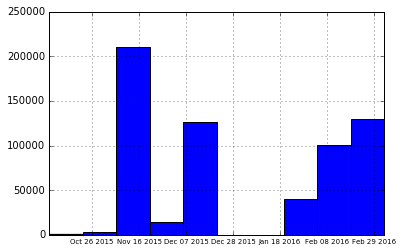

In [13]:
%matplotlib inline
df["t_created_at"].hist(xlabelsize=7)

In [14]:
#make a copy of df
dft=df.copy()

In [15]:
len(df2)

608872

In [16]:
df2.count() #retweets dataset

t_id              608872
t_lang            608872
t_created_at      608872
t_text            608872
t_retweet_n       608872
t_favorite_n      608872
u_screen_name     608872
u_name            608847
u_location        402436
u_description     515089
u_follower_n      608872
u_friend_n        608872
u_listed_n        608872
u_favorite_n      608872
u_statuse_n       608872
u_created_at      608872
u_time_zone       364893
rt_id             608872
rt_created_at     608872
rt_retweet_n      608872
rt_favorite_n     608872
ru_screen_name    608872
ru_name           608863
ru_location       475390
ru_description    591111
ru_follower_n     608872
ru_friend_n       608872
ru_listed_n       608872
ru_favorite_n     608872
ru_statuse_n      608872
ru_created_at     608872
ru_time_zone      536731
dtype: int64

Generate a binary indicator for each university

In [17]:
def uniDummy(df,text,keys):
    for key in keys:
        df[key]=pd.get_dummies(df[text].str.contains(key, na=False))[1]

Basically there are strict and loose filters for each univeristy.
Harvard could be filtered by "harvard" or by "harvard university", and the former would contains much more results since people in twitter rarely refere harvard by its full name.
For I have developed two sets of filters--one based on my knowledge of how universities are refered, and another one that uses the most restirctive reference to all 

1)The prefered filter

In [18]:
#I use columbia university instead of columbia to filter cu
#otherwise cu would be confounded with british columbia, columbia city at missouri, etc.
#For other universities I find the shorter name most useful
uniDummy(df,"t_text",["uchicago|university of chicago","harvard","stanford","princeton","columbia university","yale"])

In [19]:
uniDummy(df2,"t_text",["uchicago|university of chicago","harvard","stanford","princeton","columbia university","yale"])

In [20]:
df.columns

Index(['t_id', 't_lang', 't_created_at', 't_text', 't_retweet_n',
       't_favorite_n', 'u_screen_name', 'u_name', 'u_location',
       'u_description', 'u_follower_n', 'u_friend_n', 'u_listed_n',
       'u_favorite_n', 'u_statuse_n', 'u_created_at', 'u_time_zone', 'rt_id',
       'rt_created_at', 'rt_retweet_n', 'rt_favorite_n', 'ru_screen_name',
       'ru_name', 'ru_location', 'ru_description', 'ru_follower_n',
       'ru_friend_n', 'ru_listed_n', 'ru_favorite_n', 'ru_statuse_n',
       'ru_created_at', 'ru_time_zone', 'uchicago|university of chicago',
       'harvard', 'stanford', 'princeton', 'columbia university', 'yale'],
      dtype='object')

In [21]:
df['text']=df['t_text'] #make a copy

In [22]:
df2['text']=df2['t_text'] #make a copy

In [23]:
def rmString(df,text,keys):
    for key in keys:
        df[text]=df[text].str.replace(key,'')    

In [24]:
rmString(df,"t_text",["uchicago", "university of chicago","harvard","stanford","princeton","columbia university","yale"])

In [25]:
rmString(df2,"t_text",["uchicago", "university of chicago","harvard","stanford","princeton","columbia university","yale"])

In [26]:
df['sum']=df["uchicago|university of chicago"]+df["harvard"]+df["stanford"]+df["princeton"]+df["columbia university"]+df["yale"]

In [27]:
df2['sum']=df2["uchicago|university of chicago"]+df2["harvard"]+df2["stanford"]+df2["princeton"]+df2["columbia university"]+df2["yale"]

In [28]:
df=df[df["sum"]==1].reset_index(drop=True) #only keep tweets related to the top5 universities

In [29]:
df2=df2[df2["sum"]==1].reset_index(drop=True)

In [30]:
keys=["columbia university","harvard","princeton","stanford","uchicago|university of chicago","yale"]

In [31]:
df[keys].sum() #tweets distribution across universities

columbia university                 8131.0
harvard                           240992.0
princeton                          88694.0
stanford                          229106.0
uchicago|university of chicago     17905.0
yale                               16473.0
dtype: float64

In [32]:
df2[keys].sum()

columbia university                 6215.0
harvard                           293673.0
princeton                          55731.0
stanford                          202707.0
uchicago|university of chicago     15630.0
yale                               16167.0
dtype: float64

In [33]:
df["uni"]=df["columbia university"]+df["harvard"]*2+df["princeton"]*3+df["stanford"]*4+df["uchicago|university of chicago"]*5+df["yale"]*6

In [34]:
df2["uni"]=df2["columbia university"]+df2["harvard"]*2+df2["princeton"]*3+df2["stanford"]*4+df2["uchicago|university of chicago"]*5+df2["yale"]*6

In [35]:
df["uni"].value_counts() #categorical representation of university

2.0    240992
4.0    229106
3.0     88694
5.0     17905
6.0     16473
1.0      8131
Name: uni, dtype: int64

2.The restrictive filter

In [36]:
#this filtering would create large downward bias for harvard, stanford, princeton and yale
#since they are rarely referred by full name. I keep this for a test purpose
uniDummy(dft,"t_text",["university of chicago","harvard university","stanford university","princeton university","columbia university","yale university"])

In [37]:
rmString(dft,"t_text",["university of chicago","harvard university","stanford university","princeton university","columbia university","yale university"])

In [38]:
dft['sum']=dft["university of chicago"]+dft["harvard university"]+dft["stanford university"]+dft["princeton university"]+dft["columbia university"]+dft["yale university"]

In [40]:
dft=dft[dft["sum"]==1].reset_index(drop=True) #only keep tweets related to the top5 universities

In [43]:
keyst=["columbia university","harvard university","princeton university","stanford university","university of chicago","yale university"]

In [44]:
dft[keyst].sum() #tweets distribution across universities

columbia university       8223.0
harvard university       18881.0
princeton university      4247.0
stanford university      10168.0
university of chicago    10768.0
yale university          11974.0
dtype: float64

In [45]:
dft["uni"]=dft["columbia university"]+dft["harvard university"]*2+dft["princeton university"]*3+dft["stanford university"]*4+dft["university of chicago"]*5+dft["yale university"]*6

In [46]:
dft["uni"].value_counts() #categorical representation of university

2.0    18881
6.0    11974
5.0    10768
4.0    10168
1.0     8223
3.0     4247
Name: uni, dtype: int64

### A word tokenizer UDF

In [47]:
import string
import time
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer

In [48]:
from stop_words import get_stop_words

In [49]:
from nltk.corpus import stopwords
stop=stopwords.words('english')+get_stop_words('english')+['university','school','via','rt','study','go','take','would','will','could','can','may','got','get','u','say','do','dont','show']
exclude = set(string.punctuation)
exclude.update(['—','–','…', '📷', '😂','’',"“"])

In [50]:
def tokenize_lemmatize(text):
    text = "".join([ch for ch in text if ch not in exclude])
    tokens = [token for token in word_tokenize(text) if token not in stop]
    wnl = WordNetLemmatizer()
    wnltokens = [wnl.lemmatize(t) for t in tokens]
    return wnltokens 

# Model 1: Classification

In [100]:
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier

In [200]:
size = 8000        # sample size
replace = False  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]

In [201]:
len(df)

601301

In [202]:
dff=df.groupby('uni', as_index=False).apply(fn).reset_index(drop=True)

In [205]:
X_train, X_test, y_train, y_test = train_test_split(dff["t_text"], dff["uni"], test_size=8000, random_state=42)

In [206]:
dff[keys].sum()

columbia university               8000.0
harvard                           8000.0
princeton                         8000.0
stanford                          8000.0
uchicago|university of chicago    8000.0
yale                              8000.0
dtype: float64

In [207]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=3, tokenizer=tokenize_lemmatize, stop_words='english', ngram_range=(1,2))
%time vectors_train = tfidf_vectorizer.fit_transform(X_train) #fit the vectorizer to tweets
print(vectors_train.shape)

CPU times: user 11.3 s, sys: 0 ns, total: 11.3 s
Wall time: 11.3 s
(40000, 23380)


In [208]:
vectors_test = tfidf_vectorizer.transform(X_test)

In [209]:
mclf = MultinomialNB(alpha=0.01)

In [210]:
mclf2 = SGDClassifier(random_state=42)

In [211]:
mclf.fit(vectors_train,y_train)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [212]:
mclf2.fit(vectors_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

Model evaluation

In [213]:
pred=mclf.predict(vectors_test)

In [214]:
predsdg=mclf2.predict(vectors_test)

In [215]:
print("Accuracy: ", accuracy_score(y_test, pred))

Accuracy:  0.745


In [216]:
print("Accuracy: ", accuracy_score(y_test, predsdg))

Accuracy:  0.76


In [217]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

        1.0       0.85      0.77      0.81      1367
        2.0       0.56      0.74      0.64      1263
        3.0       0.68      0.70      0.69      1327
        4.0       0.75      0.74      0.74      1377
        5.0       0.82      0.73      0.77      1341
        6.0       0.88      0.78      0.83      1325

avg / total       0.76      0.74      0.75      8000



In [218]:
print(classification_report(y_test, predsdg))

             precision    recall  f1-score   support

        1.0       0.82      0.81      0.81      1367
        2.0       0.63      0.70      0.66      1263
        3.0       0.71      0.71      0.71      1327
        4.0       0.75      0.76      0.76      1377
        5.0       0.80      0.76      0.78      1341
        6.0       0.85      0.82      0.84      1325

avg / total       0.76      0.76      0.76      8000



In [219]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=20):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]
    for coef, feat in topn:
        print (classlabel, feat, coef)

In [220]:
keys

['columbia university',
 'harvard',
 'princeton',
 'stanford',
 'uchicago|university of chicago',
 'yale']

In [227]:
most_informative_feature_for_class(tfidf_vectorizer,mclf2,5)

5 illinois 1.60760455609
5 article edited 1.61612137703
5 law lecture 1.62705708839
5 uchifor15 1.64760488503
5 50 million 1.68095713321
5 science video 1.68217645177
5 wikipedia article 1.69183453514
5 booth business 1.70254015412
5 chicago job 1.77283623138
5 chicago apply 1.82772342086
5 maroon 1.83595616982
5 linguistics 1.87206687573
5 trauma center 2.02915498209
5 loyola 2.12982943114
5 medicine 2.18571427071
5 booth 2.77967844237
5 berniesanders 2.98249876268
5 trauma 3.06574456913
5 bernie 3.22293190623
5 chicago 5.04712841451


# Model2 Retweet Analysis

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
df2['t_text'][:10]

0    rt @tbhjuststop: "bill gates was a drop out"  ...
1    rt @longhornnetwork: empress davenport's caree...
2    rt @worldstarfunny: "bill gates was a drop out...
3    rt @thefunnyteens: "bill gates was a drop out"...
4    rt @texaswbb: final score: no. 5 texas 77, no....
5    rt @worldstarfunny: "bill gates was a drop out...
6    rt @clemsonmsoccer: halftime ||  1, #clemson 0...
7    rt @longhornnetwork: empress davenport's caree...
8    rt @antijokeapple: "bill gates was a drop out"...
9    rt @ingram1738: "bill gates was a drop out"  o...
Name: t_text, dtype: object

In [66]:
df2['t_text']=df2['t_text'].str.replace(r'(rt @\w+: )', '')

In [67]:
len(df2["rt_id"].unique())

92311

In [68]:
#remove duplicated tweets
dff2=df2.iloc[df2.groupby(['rt_id']).apply(lambda x: x['rt_retweet_n'].idxmax())]

In [69]:
dff2.columns

Index(['t_id', 't_lang', 't_created_at', 't_text', 't_retweet_n',
       't_favorite_n', 'u_screen_name', 'u_name', 'u_location',
       'u_description', 'u_follower_n', 'u_friend_n', 'u_listed_n',
       'u_favorite_n', 'u_statuse_n', 'u_created_at', 'u_time_zone', 'rt_id',
       'rt_created_at', 'rt_retweet_n', 'rt_favorite_n', 'ru_screen_name',
       'ru_name', 'ru_location', 'ru_description', 'ru_follower_n',
       'ru_friend_n', 'ru_listed_n', 'ru_favorite_n', 'ru_statuse_n',
       'ru_created_at', 'ru_time_zone', 'uchicago|university of chicago',
       'harvard', 'stanford', 'princeton', 'columbia university', 'yale',
       'text', 'sum', 'uni'],
      dtype='object')

In [70]:
dff2.groupby(['uni']).mean()

,t_id,t_retweet_n,t_favorite_n,u_follower_n,u_friend_n,u_listed_n,u_favorite_n,u_statuse_n,rt_id,rt_retweet_n,...,ru_listed_n,ru_favorite_n,ru_statuse_n,uchicago|university of chicago,harvard,stanford,princeton,columbia university,yale,sum
uni,,,,,,,,,,,,,,,,,,,,,
1.0,6.864001e+17,0.0,0.0,2859.031509,2296.647595,106.976783,8155.116086,35133.319237,6.828145e+17,12.341625,...,393.748756,5098.929519,42182.115257,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2.0,6.848190e+17,0.0,0.0,3003.583646,1664.290981,128.162013,7069.695224,30057.332568,6.813406e+17,28.242892,...,777.306000,4886.339019,38811.732604,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3.0,6.856955e+17,0.0,0.0,2591.539266,1152.405543,91.941296,7802.576347,27966.467369,6.822321e+17,9.962763,...,436.789383,3608.348556,31766.264715,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4.0,6.816808e+17,0.0,0.0,2960.770901,1757.409539,164.733189,7360.971851,32100.484121,6.791927e+17,13.198905,...,773.804403,3606.178245,33972.268345,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5.0,6.857869e+17,0.0,0.0,2202.521459,1632.825912,109.020655,5696.934549,27673.657725,6.837981e+17,7.989539,...,647.086910,3206.501609,30585.192597,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6.0,6.790361e+17,0.0,0.0,2657.738073,2182.329676,112.645515,8601.097805,39144.987595,6.759346e+17,12.412691,...,521.112118,6610.842557,56019.101145,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [160]:
dff2["rt_retweet_n"].quantile(.80)

6.0

In [161]:
#I use the top 20% as division point, which is 6 in our case
dff2["rt_retweet_n2"]=dff2["rt_retweet_n"].apply(lambda x: 0 if x < 6 else 1)

/home/sam/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [162]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(dff2["t_text"], dff2["rt_retweet_n2"], test_size=12177, random_state=42, stratify=dff2["rt_retweet_n2"])

In [163]:
y_train2.value_counts()

0    63910
1    16224
Name: rt_retweet_n2, dtype: int64

In [164]:
y_test2.value_counts()

0    9712
1    2465
Name: rt_retweet_n2, dtype: int64

In [165]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=3, tokenizer=tokenize_lemmatize, stop_words='english', ngram_range=(1,2))
%time vectors_train2 = tfidf_vectorizer.fit_transform(X_train2) #fit the vectorizer to tweets
print(vectors_train2.shape)

CPU times: user 22.3 s, sys: 12 ms, total: 22.3 s
Wall time: 22.3 s
(80134, 48029)


In [166]:
vectors_test2 = tfidf_vectorizer.transform(X_test2)

In [167]:
clf = MultinomialNB(alpha=0.01)

In [168]:
clf2 = SGDClassifier(random_state=42)

In [169]:
clf.fit(vectors_train2,y_train2)

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [170]:
clf2.fit(vectors_train2,y_train2)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [171]:
pred2=clf.predict(vectors_test2)

In [172]:
predsdg2=clf.predict(vectors_test2)

In [173]:
print("Accuracy: ", accuracy_score(y_test2, pred2))

Accuracy:  0.797158577646


In [174]:
print("Accuracy: ", accuracy_score(y_test2, predsdg2))

Accuracy:  0.797158577646


In [175]:
print(classification_report(y_test2, predsdg2))

             precision    recall  f1-score   support

          0       0.83      0.95      0.88      9712
          1       0.50      0.21      0.30      2465

avg / total       0.76      0.80      0.76     12177



In [152]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=20):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]
    for coef, feat in topn_class1:
        print (class_labels[0], coef, feat)
    print()
    for coef, feat in reversed(topn_class2):
        print (class_labels[1], coef, feat)

In [176]:
most_informative_feature_for_binary_classification(tfidf_vectorizer,clf2)

0 -0.26922691045 gate dropped
0 -0.229490411933 im blessed
0 -0.204454835528 retweeted
0 -0.190214796433 dailycaller
0 -0.184530337476 announce accepted
0 -0.179282606878 williams lead
0 -0.174733710563 cofounder donates
0 -0.168813076491 say handcuffed
0 -0.165820531484 universit
0 -0.164289268924 denied tenure
0 -0.160990150644 hcilabs analyticsedge
0 -0.160769613558 sta
0 -0.159863450186 happy announce
0 -0.158152464834 making career
0 -0.157055066633 added
0 -0.156689411296 hcilabs
0 -0.155948108012 news
0 -0.155218757735 ich2016 ikamalhaasan
0 -0.1539678973 biz
0 -0.152844927038 announce new

1 1.9378456773 denied
1 1.60520860034 genre
1 1.43806026809 politicalscience
1 1.36209264506 continuing study
1 1.31135926666 receive offer
1 1.23225379916 linguistics
1 1.09207326198 blessed receive
1 1.04962459393 continuing
1 1.04073442704 genetics
1 1.02896531231 study program
1 1.01896314665 at2015
1 1.01823170525 intensive reading
1 0.99901189477 ecology
1 0.961922667146 leader seminar


the features "dropped 11th" are related to Bill Gates story

In [180]:
for x in dff2.sort('rt_retweet_n', ascending=False)['text'][:10]:
    print (x)

rt @hahahuntr: got denied from harvard :( http://t.co/vighyu6pln
rt @chilljordan: i got accepted to harvard!!!!!!!!!!😄😱👏🎓🇺🇸 http://t.co/gq7kkgbr
rt @drvgvisual: "bill gates was a drop out"  yeah but he dropped out of harvard not 11th grade intensive reading
rt @analytics_edge: stanford to host 100-year study on artificial intelligence - http://t.co/oqjfwxu38s  #ai #analytics
rt @nohoesnextdoor: can't avoid a curve in 2015  you either too short, too nice, not an nba player, not a harvard graduate, or you care too…
rt @yaboybillnye: a recent harvard study found that lamborghini mercy does indeed make your chick so thirsty
rt @worldstarfunny: got denied from harvard :( http://t.co/wbaf14tu1i
rt @manners16: "bill gates was a dropout!"  yeah he dropped out of harvard not btec health &amp; beauty
rt @jlgoodmusic: i got accepted to harvard 😱 http://t.co/zfeyv3sqsi
rt @weloverobdyrdek: got denied from harvard :( http://t.co/eyhccrjo33


/home/sam/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [182]:
#at2015 is an account that gets good attentions
dff2[dff2.t_text.str.contains('at2015')]['t_text']

215389    rt @: what did you see #at2015? post your best...
403603    love this campus! @ #at2015 #farmphotos #unive...
215381    rt @: seen #at2015: virtual reality. share you...
215376    rt @: seen #at2015: holi. share your best camp...
181339    rt @: seen #at2015: rain (finally). share your...
167393    rt @: as the year comes to a close, join us in...
287296    rt @: #at2015: astronomers discovered a jupite...
88599           rt @: seen #at2015. https://t.co/uny04xg3to
425972    what could be more #at2015  than the student a...
468615    rt @: said #at2015. can you identify the speak...
381411    rt @: #at2015: @tseelig asked her students to ...
460838    rt @: #at2015: a study on poverty delivered co...
256187    rt @: discovered #at2015: the social cost of c...
287714    rt @: #at2015: scholars traced the settlement ...
287261    rt @: said #at2015. can you identify the speak...
137660    rt @: #at2015: richard cox discussed the secre...
88656     rt @: #at2015: adam johnson wo

# Model 3 Sentiment Analysis

In [51]:
from textblob import TextBlob

In [52]:
df['polarity'] = df.apply(lambda x: TextBlob(x['t_text']).sentiment.polarity, axis=1)

In [53]:
df['subjectivity'] = df.apply(lambda x: TextBlob(x['t_text']).sentiment.subjectivity, axis=1)

In [54]:
df.groupby(['uni']).agg(['mean', 'count']) #mean sentiment for each university

t_id         t_retweet_n         t_favorite_n          \
                   mean   count        mean   count         mean   count   
uni                                                                        
1.0  685475114488691328    8131           0    8131            0    8131   
2.0  684412384206726528  240992           0  240992            0  240992   
3.0  683787674944514304   88694           0   88694            0   88694   
4.0  679533051556261504  229106           0  229106            0  229106   
5.0  685108482103091456   17905           0   17905            0   17905   
6.0  677539948777027328   16473           0   16473            0   16473   

    u_follower_n           u_friend_n           ...   columbia university  \
            mean   count         mean   count   ...                  mean   
uni                                             ...                         
1.0  6372.007133    8131  2439.352109    8131   ...                   1.0   
2.0  9837.840372  240992  1945.875344  240992   ...                   0.0   
3.0  5681.419927   88694  1469.926286   88694   ...                   0.0   
4.0  7905.365303  229106  1512.250142  229106   ...                   0.0   
5.0  6831.007651   17905  1955.096509   17905   ...                   0.0   
6.0  9109.990651   16473  2124.015480   16473   ...                   0.0   

            yale          sum          polarity         subjectivity          
      count mean   count mean   count      mean   count         mean   count  
uni                                                                           
1.0    8131  0.0    8131  1.0    8131  0.070550    8131     0.264879    8131  
2.0  240992  0.0  240992  1.0  240992  0.088566  240992     0.266650  240992  
3.0   88694  0.0   88694  1.0   88694  0.091136   88694     0.257021   88694  
4.0  229106  0.0  229106  1.0  229106  0.098140  229106     0.279106  229106  
5.0   17905  0.0   17905  1.0   17905  0.082105   17905     0.214034   17905  
6.0   16473  1.0   16473  1.0   16473  0.062898   16473     0.248297   16473  

[6 rows x 56 columns]

In [55]:
df[df["t_text"].str.contains('campus', na=False)].groupby(['uni']).agg(['mean', 'count']) #mean sentiment for each university

t_id       t_retweet_n       t_favorite_n        \
                   mean count        mean count         mean count   
uni                                                                  
1.0  675166926921513344    68           0    68            0    68   
2.0  676453765936367232  1981           0  1981            0  1981   
3.0  683178256887795072   912           0   912            0   912   
4.0  682735793583931136   714           0   714            0   714   
5.0  681543280014180608   330           0   330            0   330   
6.0  666444492925387520  1521           0  1521            0  1521   

     u_follower_n         u_friend_n        ...  columbia university        \
             mean count         mean count  ...                 mean count   
uni                                         ...                              
1.0   5634.970588    68  1353.882353    68  ...                  1.0    68   
2.0  15352.519435  1981  1529.511358  1981  ...                  0.0  1981   
3.0   3975.172149   912  1569.442982   912  ...                  0.0   912   
4.0   7473.696078   714  1157.697479   714  ...                  0.0   714   
5.0   9827.163636   330  1873.321212   330  ...                  0.0   330   
6.0   5053.733070  1521  1971.953978  1521  ...                  0.0  1521   

    yale        sum        polarity       subjectivity        
    mean count mean count      mean count         mean count  
uni                                                           
1.0  0.0    68  1.0    68  0.042760    68     0.242494    68  
2.0  0.0  1981  1.0  1981  0.059816  1981     0.334305  1981  
3.0  0.0   912  1.0   912  0.056348   912     0.237491   912  
4.0  0.0   714  1.0   714  0.196099   714     0.368628   714  
5.0  0.0   330  1.0   330  0.100306   330     0.315978   330  
6.0  1.0  1521  1.0  1521 -0.003692  1521     0.179784  1521  

[6 rows x 56 columns]

In [63]:
#notice that although columbia 'tuition' is very negaive, there are only three data points
df[df["t_text"].str.contains('tuition', na=False)].groupby(['uni']).agg(['mean', 'count']) #mean sentiment for each university

t_id       t_retweet_n       t_favorite_n        \
                   mean count        mean count         mean count   
uni                                                                  
1.0  676028304343455104     3           0     3            0     3   
2.0  691642111022870912   659           0   659            0   659   
3.0  691597970602674944    92           0    92            0    92   
4.0  693619446026927744   392           0   392            0   392   
5.0  681957399816789376    13           0    13            0    13   
6.0  670391649844321920    19           0    19            0    19   

     u_follower_n         u_friend_n        ...  columbia university        \
             mean count         mean count  ...                 mean count   
uni                                         ...                              
1.0    721.666667     3  1217.333333     3  ...                  1.0     3   
2.0  14791.605463   659  2018.051593   659  ...                  0.0   659   
3.0   4004.065217    92  2427.586957    92  ...                  0.0    92   
4.0   5306.566327   392  1893.558673   392  ...                  0.0   392   
5.0    667.153846    13   543.307692    13  ...                  0.0    13   
6.0  12786.000000    19  9946.315789    19  ...                  0.0    19   

    yale        sum        polarity       subjectivity        
    mean count mean count      mean count         mean count  
uni                                                           
1.0  0.0     3  1.0     3 -0.200000     3     0.300000     3  
2.0  0.0   659  1.0   659  0.114526   659     0.399744   659  
3.0  0.0    92  1.0    92  0.082507    92     0.119082    92  
4.0  0.0   392  1.0   392  0.085828   392     0.290331   392  
5.0  0.0    13  1.0    13  0.084872    13     0.442372    13  
6.0  1.0    19  1.0    19  0.240203    19     0.509318    19  

[6 rows x 56 columns]

In [56]:
df[df["t_text"].str.contains('economics', na=False)].groupby(['uni']).agg(['mean', 'count']) #mean sentiment for each university

t_id       t_retweet_n       t_favorite_n        \
                   mean count        mean count         mean count   
uni                                                                  
1.0  672034897199987712     8           0     8            0     8   
2.0  692803818632498432   842           0   842            0   842   
3.0  680069994212160768   100           0   100            0   100   
4.0  687153885264217984   183           0   183            0   183   
5.0  690283367536355328    84           0    84            0    84   
6.0  681895688885844736    22           0    22            0    22   

     u_follower_n         u_friend_n        ...  columbia university        \
             mean count         mean count  ...                 mean count   
uni                                         ...                              
1.0    897.125000     8   787.125000     8  ...                  1.0     8   
2.0  12583.853919   842  1401.742280   842  ...                  0.0   842   
3.0   7976.970000   100  3830.370000   100  ...                  0.0   100   
4.0  25757.978142   183  8608.978142   183  ...                  0.0   183   
5.0   2305.452381    84  1461.654762    84  ...                  0.0    84   
6.0   1302.590909    22   625.500000    22  ...                  0.0    22   

    yale        sum        polarity       subjectivity        
    mean count mean count      mean count         mean count  
uni                                                           
1.0  0.0     8  1.0     8 -0.003527     8     0.231818     8  
2.0  0.0   842  1.0   842  0.032676   842     0.110764   842  
3.0  0.0   100  1.0   100  0.085891   100     0.196985   100  
4.0  0.0   183  1.0   183  0.038947   183     0.111391   183  
5.0  0.0    84  1.0    84  0.160752    84     0.193600    84  
6.0  1.0    22  1.0    22 -0.002438    22     0.163388    22  

[6 rows x 56 columns]

To test the restrictive filtering method

In [58]:
dft['polarity'] = dft.apply(lambda x: TextBlob(x['t_text']).sentiment.polarity, axis=1)
dft['subjectivity'] = dft.apply(lambda x: TextBlob(x['t_text']).sentiment.subjectivity, axis=1)
dft.groupby(['uni']).agg(['mean', 'count']) #mean sentiment for each university

t_id        t_retweet_n        t_favorite_n         \
                   mean  count        mean  count         mean  count   
uni                                                                     
1.0  685416355599243264   8223           0   8223            0   8223   
2.0  682888549238076928  18881           0  18881            0  18881   
3.0  686024063728185344   4247           0   4247            0   4247   
4.0  687814203394334336  10168           0  10168            0  10168   
5.0  685496657531372032  10768           0  10768            0  10768   
6.0  678894626611961728  11974           0  11974            0  11974   

     u_follower_n          u_friend_n         ...   columbia university  \
             mean  count         mean  count  ...                  mean   
uni                                           ...                         
1.0   6313.913292   8223  2427.808951   8223  ...                   1.0   
2.0  12798.183412  18881  2119.127695  18881  ...                   0.0   
3.0   4558.649164   4247  2074.696727   4247  ...                   0.0   
4.0   9649.530389  10168  4774.863297  10168  ...                   0.0   
5.0   8481.140137  10768  2543.804606  10768  ...                   0.0   
6.0  10199.804744  11974  2121.393102  11974  ...                   0.0   

           yale university         sum         polarity        subjectivity  \
     count            mean  count mean  count      mean  count         mean   
uni                                                                           
1.0   8223             0.0   8223  1.0   8223  0.070008   8223     0.263474   
2.0  18881             0.0  18881  1.0  18881  0.055430  18881     0.147392   
3.0   4247             0.0   4247  1.0   4247  0.101436   4247     0.217818   
4.0  10168             0.0  10168  1.0  10168  0.063103  10168     0.160764   
5.0  10768             0.0  10768  1.0  10768  0.062440  10768     0.165686   
6.0  11974             1.0  11974  1.0  11974  0.050447  11974     0.217862   

            
     count  
uni         
1.0   8223  
2.0  18881  
3.0   4247  
4.0  10168  
5.0  10768  
6.0  11974  

[6 rows x 56 columns]

# Model 4 Topic Modelling

In [185]:
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
import re
from gensim import corpora, models
import pyLDAvis.gensim
import string
from collections import defaultdict
from gensim import corpora, models, similarities
from time import time
from nltk.tokenize import RegexpTokenizer

/home/sam/anaconda3/lib/python3.5/site-packages/funcy/decorators.py:56: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  spec = inspect.getargspec(func)
/home/sam/anaconda3/lib/python3.5/site-packages/funcy/decorators.py:56: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  spec = inspect.getargspec(func)
/home/sam/anaconda3/lib/python3.5/site-packages/funcy/decorators.py:56: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  spec = inspect.getargspec(func)
/home/sam/anaconda3/lib/python3.5/site-packages/funcy/decorators.py:56: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  spec = inspect.getargspec(func)
/home/sam/anaconda3/lib/python3.5/site-packages/funcy/decorators.py:56: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  spec = inspect.getargspec(func)
/home/sam/anaconda3/lib/python

### UChicago tweets

In [188]:
print("Loading dataset...")
t0 = time()
data = df[df["uni"]==5]
tokenizer = RegexpTokenizer(r'\w+')
documents = data["t_text"].tolist()
print("Number of Tweets",len(documents),"done in %0.3fs." % (time() - t0))
print("Tokenizing, removing non-informative words and lemmatizing")
t0 = time()
documents = [tokenize_lemmatize(doc.lower()) for doc in documents ]
print("Pre-processing done in %0.3fs." % (time() - t0))
print("Generating dictionary and corpus")
# Sort words in documents
for doc in documents:
    doc.sort()
dictionary = corpora.Dictionary(documents) # Build a dictionary where for each document each word has its own id
dictionary.compactify() 
dictionary.save('uchicago.dict') # and save the dictionary for future use
corpus = [dictionary.doc2bow(doc) for doc in documents] # Build the corpus: vectors with occurence of each word for each document
corpora.MmCorpus.serialize('uchicago.mm', corpus) # and save in Market Matrix format
print("Finish")

Loading dataset...
Number of Tweets 17905 done in 0.014s.
Tokenizing, removing non-informative words and lemmatizing
Pre-processing done in 4.225s.
Generating dictionary and corpus
Finish


In [189]:
#topic modelling: the LDA model
from gensim import corpora, models, similarities
print("Loading data")
# Initialize Parameters
corpus_filename = 'uchicago.mm'
dict_filename   = 'uchicago.dict'

for n in [10,20]:
    lda_filename    = 'uchicago'+str(n)+'.lda'
    lda_params      = {'passes': 5, 'alpha': 'auto'}
    # Load the corpus and Dictionary
    corpus = corpora.MmCorpus(corpus_filename)
    dictionary = corpora.Dictionary.load(dict_filename)
    print("Running LDA with: %s  topics" % n)
    lda = models.LdaModel(corpus, id2word=dictionary,num_topics=n,passes=lda_params['passes'],alpha = lda_params['alpha'])
    lda.save(lda_filename)
    print("lda saved in %s " % lda_filename)

Loading data
Running LDA with: 10  topics
lda saved in uchicago10.lda 
Running LDA with: 20  topics
lda saved in uchicago20.lda 


### Yale tweets

In [ ]:
print("Loading dataset...")
t0 = time()
data = df[df["uni"]==6]
tokenizer = RegexpTokenizer(r'\w+')
documents = data["t_text"].tolist()
print("Number of Tweets",len(documents),"done in %0.3fs." % (time() - t0))
print("Tokenizing, removing non-informative words and lemmatizing")
t0 = time()
documents = [tokenize_lemmatize(doc.lower()) for doc in documents ]
print("Pre-processing done in %0.3fs." % (time() - t0))
print("Generating dictionary and corpus")
# Sort words in documents
for doc in documents:
    doc.sort()
dictionary = corpora.Dictionary(documents) # Build a dictionary where for each document each word has its own id
dictionary.compactify() 
dictionary.save('yale.dict') # and save the dictionary for future use
corpus = [dictionary.doc2bow(doc) for doc in documents] # Build the corpus: vectors with occurence of each word for each document
corpora.MmCorpus.serialize('yale.mm', corpus) # and save in Market Matrix format
print("Finish")

In [ ]:
from gensim import corpora, models, similarities
print("Loading data")
# Initialize Parameters
corpus_filename = 'yale.mm'
dict_filename   = 'yale.dict'

for n in [10,20]:
    lda_filename    = 'yale'+str(n)+'.lda'
    lda_params      = {'passes': 5, 'alpha': 'auto'}
    # Load the corpus and Dictionary
    corpus = corpora.MmCorpus(corpus_filename)
    dictionary = corpora.Dictionary.load(dict_filename)
    print("Running LDA with: %s  topics" % n)
    lda = models.LdaModel(corpus, id2word=dictionary,num_topics=n,passes=lda_params['passes'],alpha = lda_params['alpha'])
    lda.save(lda_filename)
    print("lda saved in %s " % lda_filename)

### Columbia Tweets

In [186]:
print("Loading dataset...")
t0 = time()
data = df[df["uni"]==1]
tokenizer = RegexpTokenizer(r'\w+')
documents = data["t_text"].tolist()
print("Number of Tweets",len(documents),"done in %0.3fs." % (time() - t0))
print("Tokenizing, removing non-informative words and lemmatizing")
t0 = time()
documents = [tokenize_lemmatize(doc.lower()) for doc in documents ]
print("Pre-processing done in %0.3fs." % (time() - t0))
print("Generating dictionary and corpus")
# Sort words in documents
for doc in documents:
    doc.sort()
dictionary = corpora.Dictionary(documents) # Build a dictionary where for each document each word has its own id
dictionary.compactify() 
dictionary.save('columbia.dict') # and save the dictionary for future use
corpus = [dictionary.doc2bow(doc) for doc in documents] # Build the corpus: vectors with occurence of each word for each document
corpora.MmCorpus.serialize('columbia.mm', corpus) # and save in Market Matrix format
print("Finish")

Loading dataset...
Number of Tweets 8131 done in 0.006s.
Tokenizing, removing non-informative words and lemmatizing
Pre-processing done in 1.876s.
Generating dictionary and corpus
Finish


In [187]:
from gensim import corpora, models, similarities
print("Loading data")
# Initialize Parameters
corpus_filename = 'columbia.mm'
dict_filename   = 'columbia.dict'

for n in [10,20]:
    lda_filename    = 'columbia'+str(n)+'.lda'
    lda_params      = {'passes': 5, 'alpha': 'auto'}
    # Load the corpus and Dictionary
    corpus = corpora.MmCorpus(corpus_filename)
    dictionary = corpora.Dictionary.load(dict_filename)
    print("Running LDA with: %s  topics" % n)
    lda = models.LdaModel(corpus, id2word=dictionary,num_topics=n,passes=lda_params['passes'],alpha = lda_params['alpha'])
    lda.save(lda_filename)
    print("lda saved in %s " % lda_filename)

Loading data
Running LDA with: 10  topics
lda saved in columbia10.lda 
Running LDA with: 20  topics
lda saved in columbia20.lda 


### Harvard Tweets

In [ ]:
print("Loading dataset...")
t0 = time()
data = df[df["uni"]==2]
tokenizer = RegexpTokenizer(r'\w+')
documents = data["t_text"].tolist()
print("Number of Tweets",len(documents),"done in %0.3fs." % (time() - t0))
print("Tokenizing, removing non-informative words and lemmatizing")
t0 = time()
documents = [tokenize_lemmatize(doc.lower()) for doc in documents ]
print("Pre-processing done in %0.3fs." % (time() - t0))
print("Generating dictionary and corpus")
# Sort words in documents
for doc in documents:
    doc.sort()
dictionary = corpora.Dictionary(documents) # Build a dictionary where for each document each word has its own id
dictionary.compactify() 
dictionary.save('harvard.dict') # and save the dictionary for future use
corpus = [dictionary.doc2bow(doc) for doc in documents] # Build the corpus: vectors with occurence of each word for each document
corpora.MmCorpus.serialize('harvard.mm', corpus) # and save in Market Matrix format
print("Finish")

In [ ]:
from gensim import corpora, models, similarities
print("Loading data")
# Initialize Parameters
corpus_filename = 'harvard.mm'
dict_filename   = 'harvard.dict'

for n in [10,20]:
    lda_filename    = 'harvard'+str(n)+'.lda'
    lda_params      = {'passes': 5, 'alpha': 'auto'}
    # Load the corpus and Dictionary
    corpus = corpora.MmCorpus(corpus_filename)
    dictionary = corpora.Dictionary.load(dict_filename)
    print("Running LDA with: %s  topics" % n)
    lda = models.LdaModel(corpus, id2word=dictionary,num_topics=n,passes=lda_params['passes'],alpha = lda_params['alpha'])
    lda.save(lda_filename)
    print("lda saved in %s " % lda_filename)

### Stanford Tweets

In [ ]:
print("Loading dataset...")
t0 = time()
data = df[df["uni"]==4]
tokenizer = RegexpTokenizer(r'\w+')
documents = data["t_text"].tolist()
print("Number of Tweets",len(documents),"done in %0.3fs." % (time() - t0))
print("Tokenizing, removing non-informative words and lemmatizing")
t0 = time()
documents = [tokenize_lemmatize(doc.lower()) for doc in documents ]
print("Pre-processing done in %0.3fs." % (time() - t0))
print("Generating dictionary and corpus")
# Sort words in documents
for doc in documents:
    doc.sort()
dictionary = corpora.Dictionary(documents) # Build a dictionary where for each document each word has its own id
dictionary.compactify() 
dictionary.save('stanford.dict') # and save the dictionary for future use
corpus = [dictionary.doc2bow(doc) for doc in documents] # Build the corpus: vectors with occurence of each word for each document
corpora.MmCorpus.serialize('stanford.mm', corpus) # and save in Market Matrix format
print("Finish")

In [ ]:
from gensim import corpora, models, similarities
print("Loading data")
# Initialize Parameters
corpus_filename = 'stanford.mm'
dict_filename   = 'stanford.dict'

for n in [10,20]:
    lda_filename    = 'stanford'+str(n)+'.lda'
    lda_params      = {'passes': 5, 'alpha': 'auto'}
    # Load the corpus and Dictionary
    corpus = corpora.MmCorpus(corpus_filename)
    dictionary = corpora.Dictionary.load(dict_filename)
    print("Running LDA with: %s  topics" % n)
    lda = models.LdaModel(corpus, id2word=dictionary,num_topics=n,passes=lda_params['passes'],alpha = lda_params['alpha'])
    lda.save(lda_filename)
    print("lda saved in %s " % lda_filename)